In [41]:
! pip install pandas
! pip install scikit-learn
! pip install scikit-image
! pip install pickle


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [42]:
import os
import pickle
import numpy as np

from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, f1_score, confusion_matrix
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import seaborn as sns


import matplotlib.pyplot as plt


In [43]:
input_dir = os.getcwd() + '\\dataset\\Brain Tumor Data Set'

data = []

labels = []

categories = ['Brain Tumor', 'Healthy']

In [44]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)

In [45]:
max_shape = tuple(max(dim) for dim in zip(*[arr.shape for arr in data]))
xd = np.array([np.pad(arr, [(0, max_shape[i] - arr.shape[i]) for i in range(len(arr.shape))], mode='constant') for arr in data])

labels = np.asarray(labels)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(xd, labels, test_size=0.1, shuffle=True, stratify=labels)

In [47]:
classifier = SVC()

parameters = {'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001]})

In [48]:
y_train_pred = grid_search.predict(x_train)

print("Train")
print("Accuracy =", accuracy_score(y_train, y_train_pred))

print("Kappa =", cohen_kappa_score(y_train, y_train_pred))

print("Precision =", precision_score(y_train, y_train_pred, average='micro'))

print("F1-score =", f1_score(y_train, y_train_pred, average='micro'))

Train
Accuracy = 0.998792270531401
Kappa = 0.9975630292464746
Precision = 0.998792270531401
F1-score = 0.998792270531401


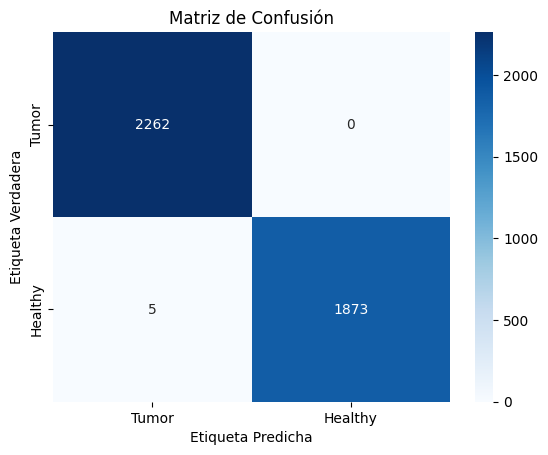

In [49]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)


class_labels=["Tumor", "Healthy"]


sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')


plt.show()

In [50]:
y_test_pred = grid_search.predict(x_test)

print("Test")
print("Accuracy =", accuracy_score(y_test, y_test_pred))

print("Kappa =", cohen_kappa_score(y_test, y_test_pred))

print("Precision =", precision_score(y_test, y_test_pred, average='micro'))

print("F1-score =", f1_score(y_test, y_test_pred, average='micro'))

Test
Accuracy = 0.9782608695652174
Kappa = 0.9561211057481351
Precision = 0.9782608695652174
F1-score = 0.9782608695652174


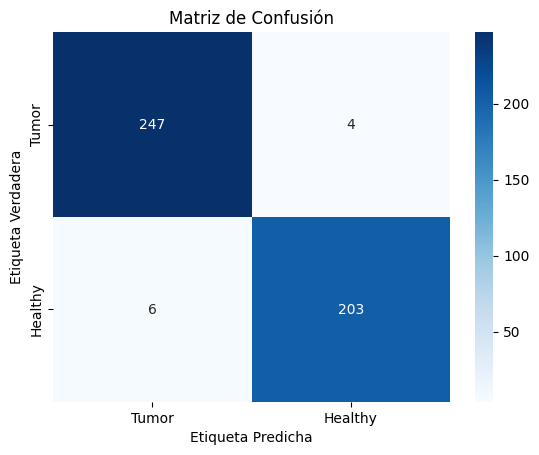

In [51]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)


class_labels=["Tumor", "Healthy"]


sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')


plt.show()


In [52]:
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)

In [53]:
print('{}% of samples wer correctly classified'.format(str(score*100)))

97.82608695652173% of samples wer correctly classified


In [54]:
import joblib

joblib.dump(grid_search, 'pkl/model.pkl')


['pkl/model.pkl']